<a href="https://colab.research.google.com/github/nehana4sph/RIO-210-Build-a-Classification-Model-for-Drug-Trials-Dataset-Batch-01/blob/main/ML_Project_Side_effects_of_drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step wise solution**


1.   Import libraries and load data file

**Perform the following EDA**

2. List 15 rows of your data
3. Check the ratings of the drugs
4. Check the effectivness of the drugs
5. Check the conditions cured by the drugs
6. Transform/ Scale your data
7. Split your data into train and test
8. Train your model with training data and test the results using testing set
9. Test multiple model and finalize the best one




**Step 1 - Importing libraries and loading datafile**

In [ ]:
#@title Default title text
import pandas as pd 
import numpy as np 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

# lets load and read the file

df = pd.read_csv('drugEffects.csv').drop(columns=['Unnamed: 0'])
df.head()

**2. List 15 rows of your data**

In [ ]:
df[['urlDrugName', 'condition']].head(15)

,urlDrugName,condition
0,enalapril,management of congestive heart failure
1,ortho-tri-cyclen,birth prevention
2,ponstel,menstrual cramps
3,prilosec,acid reflux
4,lyrica,fibromyalgia
5,propecia,hair loss
6,vyvanse,add
7,elavil,depression
8,xanax,panic disorder
9,claritin,allergies


**3. Check the ratings of the drugs**

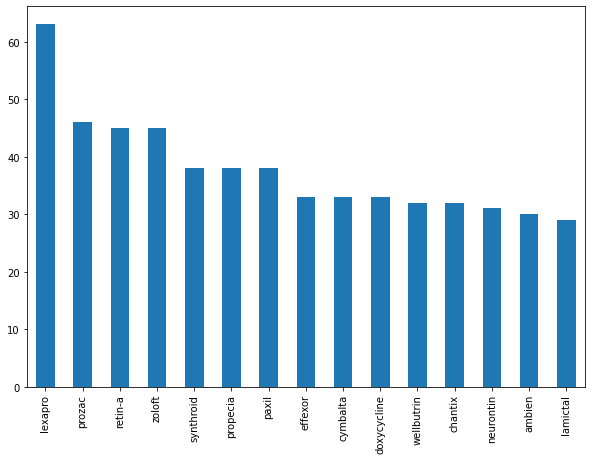

In [ ]:
# lets check the list of drugs availabe (top 10)

df['urlDrugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

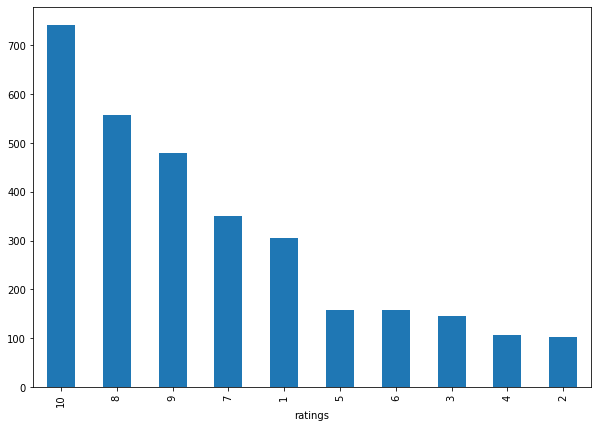

In [ ]:
# lets check the ratings of the drugs 

df['rating'].value_counts().plot(kind='bar')
plt.xlabel('ratings')
plt.show()

**4. Check the effectivness of the drugs**

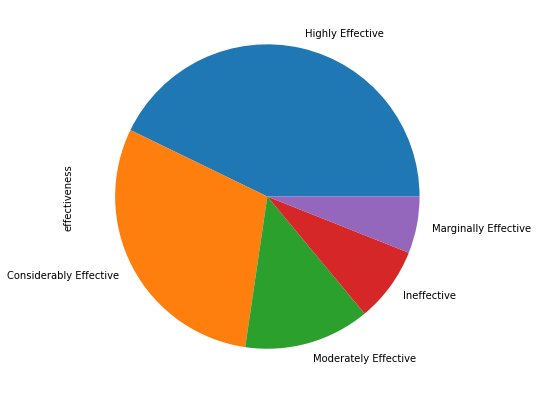

In [ ]:
# lets check the effectiveness of the drugs

df['effectiveness'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df['condition'].value_counts()

depression                                           236
acne                                                 165
anxiety                                               63
insomnia                                              54
birth control                                         49
                                                    ... 
for epilepsy                                           1
hyperpigmentation, photoaging, mild hormonal acne      1
prostatitis                                            1
hypothryroid                                           1
skin cancer                                            1
Name: condition, Length: 1426, dtype: int64

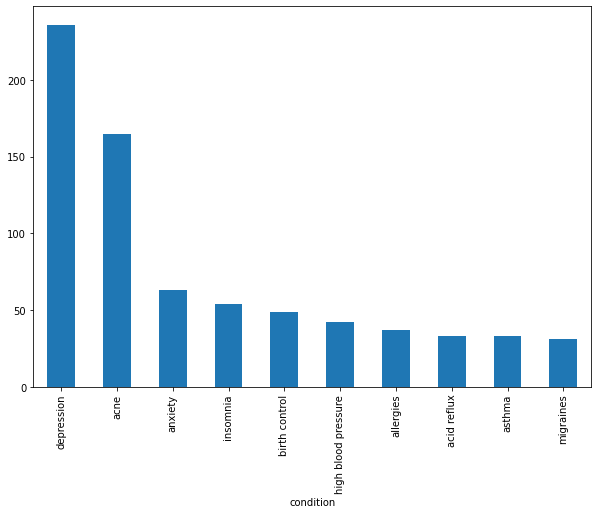

In [ ]:
# lets check the various conditions the medicine cures (top 10) since they are over thousand

df['condition'].value_counts().head(10).plot(kind='bar')
plt.xlabel('condition')
plt.show()

**5. Check the conditions cured by the drugs**

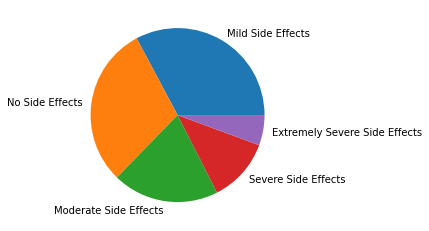

In [ ]:
# lets check our target variable 'sideEffects'

df['sideEffects'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
# put target into a seperate columns

target = df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


**6. Transform/ Scale your data**

In [ ]:
# lets convert categorical data to numeric

cols = ['urlDrugName', 'effectiveness', 'condition']

for x in cols:
  df[x] = pd.factorize(df[x])[0]

target = pd.factorize(target)[0]
df.head()


,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


**7. Split your data into train and test**

In [ ]:
# scaling the data before modelling

scaler = StandardScaler()
df = scaler.fit_transform(df)

df

array([[-1.21297976, -1.02349444, -1.04689456, -0.94221638],
       [-1.20449215, -2.04490682, -1.04689456, -0.93987936],
       [-1.19600454,  1.01933033, -1.04689456, -0.93754234],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38803771],
       [ 3.03931298,  0.33838874,  0.85712577, -0.67112201],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74123262]])

**8. Train your model with training data and test the results using testing set**

In [ ]:
# splitting data into train and validation

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=.3)

**9. Test multiple model and finalize the best one**

In [ ]:
# using svm

svm_clf = SVC().fit(x_train, y_train)

svm_pred = svm_clf.predict(x_test)

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.44      0.51      0.47       301
           1       0.43      0.53      0.47       118
           2       0.54      0.57      0.55       276
           3       0.32      0.17      0.22        54
           4       0.46      0.29      0.35       184

    accuracy                           0.47       933
   macro avg       0.44      0.41      0.41       933
weighted avg       0.46      0.47      0.46       933



In [ ]:
# using random forest 

rf_clf = RandomForestClassifier().fit(x_train, y_train)

rf_pred = rf_clf.predict(x_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.40      0.53      0.46       228
           1       0.33      0.29      0.31        95
           2       0.60      0.46      0.52       256
           3       0.39      0.57      0.46        37
           4       0.39      0.34      0.36       161

    accuracy                           0.44       777
   macro avg       0.42      0.44      0.42       777
weighted avg       0.45      0.44      0.44       777

